In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD, Adam

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 54s 0us/step


In [3]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
# Convert actual output to one-hot encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
def create_cnn_model(optimizer='adam'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
# Define hyperparameters
optimizers = ['sgd', 'adam']
learning_rates = [0.001, 0.01]
epochs = 10

In [7]:
# Track history of training and validation
history_dict = {}

In [9]:
for optimizer in optimizers:
    for learning_rate in learning_rates:
        # Create model
        model = create_cnn_model(optimizer)
        
        # Set learning rate for SGD optimizer
        if optimizer == 'sgd':
            model.optimizer = SGD(learning_rate=learning_rate)

        # Train the model
        history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=0)
        
        # Store history for plotting
        key = f'{optimizer}_lr_{learning_rate}'
        history_dict[key] = history

KeyboardInterrupt: 

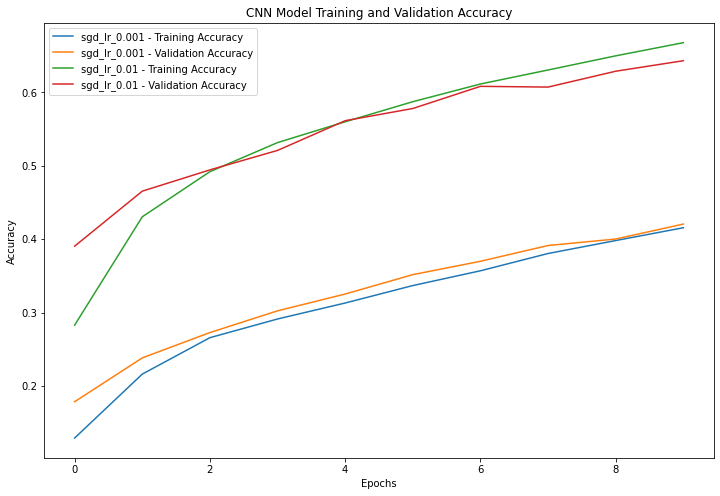

In [10]:
plt.figure(figsize=(12, 8))

for key, history in history_dict.items():
    plt.plot(history.history['accuracy'], label=f'{key} - Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{key} - Validation Accuracy')

plt.title('CNN Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()